Estimated mean probabilities for each flavor:
Vanilla: 0.627
Chocolate: 0.187
Strawberry: 0.123
Pistachio: 0.063

--- Chi-Square Test ---
Chi2 Statistic: 867.104
Degrees of Freedom: 3
P-Value: 0.00000
Reject H0: The flavor distribution is NOT uniform.


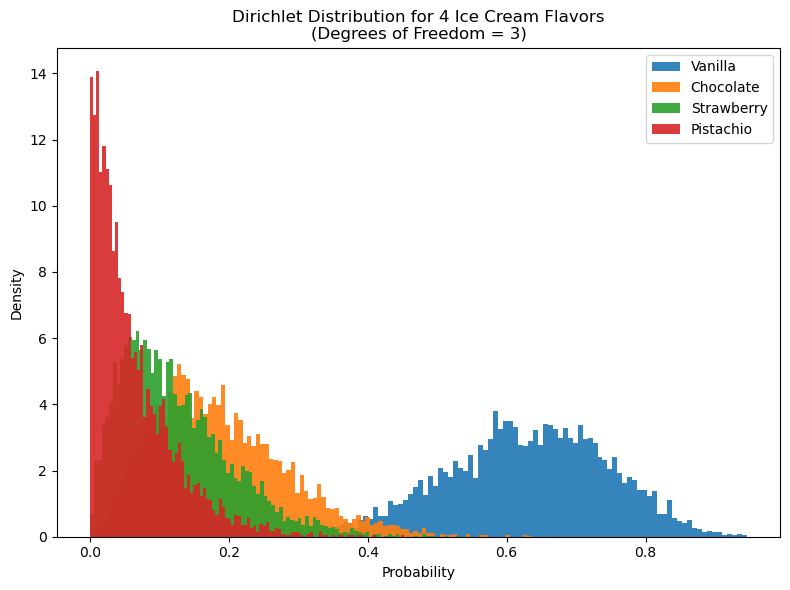

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import dirichlet, chisquare

# --- Dirichlet Parameters ---
alpha = np.array([10, 3, 2, 1])  # vanilla, chocolate, strawberry, pistachio
flavors = ["Vanilla", "Chocolate", "Strawberry", "Pistachio"]

# --- Generate Samples from Dirichlet Distribution ---
n_samples = 5000
samples = np.random.dirichlet(alpha, size=n_samples)

# --- Estimate Mean Probabilities ---
mean_probs = samples.mean(axis=0)
print("Estimated mean probabilities for each flavor:")
for flavor, prob in zip(flavors, mean_probs):
    print(f"{flavor}: {prob:.3f}")

# --- Simulate Observations ---
n_customers = 1000
observed_counts = np.random.multinomial(n_customers, mean_probs)
expected_counts = np.full(len(flavors), n_customers / len(flavors))  # Equal distribution

# --- Chi-Square Test ---
chi2_stat, p_value = chisquare(f_obs=observed_counts, f_exp=expected_counts)
degrees_of_freedom = len(observed_counts) - 1  # df = number of categories - 1

print("\n--- Chi-Square Test ---")
print(f"Chi2 Statistic: {chi2_stat:.3f}")
print(f"Degrees of Freedom: {degrees_of_freedom}")
print(f"P-Value: {p_value:.5f}")

if p_value < 0.05:
    print("Reject H0: The flavor distribution is NOT uniform.")
else:
    print("Fail to reject H0: The flavor distribution is uniform.")

# --- Visualize Dirichlet Distribution ---
fig, ax = plt.subplots(figsize=(8, 6))
for i, flavor in enumerate(flavors):
    ax.hist(samples[:, i], bins=100, alpha=0.9, label=flavor, density=True)

ax.set_title("Dirichlet Distribution for 4 Ice Cream Flavors\n(Degrees of Freedom = 3)")
ax.set_xlabel("Probability")
ax.set_ylabel("Density")
ax.legend()
plt.tight_layout()
plt.show()
